
Probabilistic predictions with Gaussian process classification (GPC)

This example illustrates the predicted probability of GPC for an RBF kernel
with different choices of the hyperparameters. The first figure shows the
predicted probability of GPC with arbitrarily chosen hyperparameters and with
the hyperparameters corresponding to the maximum log-marginal-likelihood (LML).

While the hyperparameters chosen by optimizing LML have a considerable larger
LML, they perform slightly worse according to the log-loss on test data. The
figure shows that this is because they exhibit a steep change of the class
probabilities at the class boundaries (which is good) but have predicted
probabilities close to 0.5 far away from the class boundaries (which is bad)
This undesirable effect is caused by the Laplace approximation used
internally by GPC.

The second figure shows the log-marginal-likelihood for different choices of
the kernel's hyperparameters, highlighting the two choices of the
hyperpara

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Log Marginal Likelihood (initial): -17.598
Log Marginal Likelihood (optimized): -3.875
Accuracy: 1.000 (initial) 1.000 (optimized)
Log-loss: 0.214 (initial) 0.319 (optimized)


<ipython-input-1-ea034173f6d0>:94: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(Theta0, Theta1, LML)


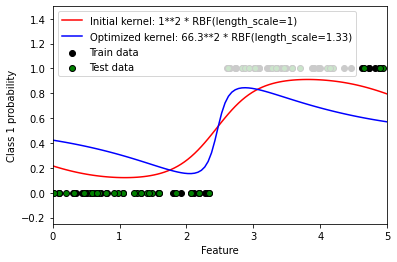

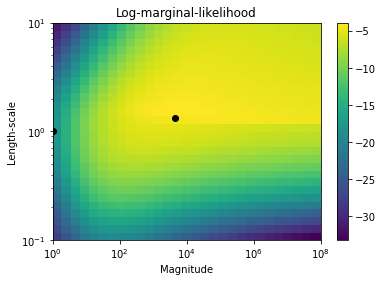

In [1]:
"""
====================================================================
Probabilistic predictions with Gaussian process classification (GPC)
====================================================================

This example illustrates the predicted probability of GPC for an RBF kernel
with different choices of the hyperparameters. The first figure shows the
predicted probability of GPC with arbitrarily chosen hyperparameters and with
the hyperparameters corresponding to the maximum log-marginal-likelihood (LML).

While the hyperparameters chosen by optimizing LML have a considerable larger
LML, they perform slightly worse according to the log-loss on test data. The
figure shows that this is because they exhibit a steep change of the class
probabilities at the class boundaries (which is good) but have predicted
probabilities close to 0.5 far away from the class boundaries (which is bad)
This undesirable effect is caused by the Laplace approximation used
internally by GPC.

The second figure shows the log-marginal-likelihood for different choices of
the kernel's hyperparameters, highlighting the two choices of the
hyperparameters used in the first figure by black dots.
"""
print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


# Generate data
train_size = 50
rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 100)[:, np.newaxis]
y = np.array(X[:, 0] > 2.5, dtype=int)

# Specify Gaussian Processes with fixed and optimized hyperparameters
gp_fix = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0),
                                   optimizer=None)
gp_fix.fit(X[:train_size], y[:train_size])

gp_opt = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
gp_opt.fit(X[:train_size], y[:train_size])

print("Log Marginal Likelihood (initial): %.3f"
      % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f"
      % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))

print("Accuracy: %.3f (initial) %.3f (optimized)"
      % (accuracy_score(y[:train_size], gp_fix.predict(X[:train_size])),
         accuracy_score(y[:train_size], gp_opt.predict(X[:train_size]))))
print("Log-loss: %.3f (initial) %.3f (optimized)"
      % (log_loss(y[:train_size], gp_fix.predict_proba(X[:train_size])[:, 1]),
         log_loss(y[:train_size], gp_opt.predict_proba(X[:train_size])[:, 1])))


# Plot posteriors
plt.figure(0)
plt.scatter(X[:train_size, 0], y[:train_size], c='k', label="Train data",
            edgecolors=(0, 0, 0))
plt.scatter(X[train_size:, 0], y[train_size:], c='g', label="Test data",
            edgecolors=(0, 0, 0))
X_ = np.linspace(0, 5, 100)
plt.plot(X_, gp_fix.predict_proba(X_[:, np.newaxis])[:, 1], 'r',
         label="Initial kernel: %s" % gp_fix.kernel_)
plt.plot(X_, gp_opt.predict_proba(X_[:, np.newaxis])[:, 1], 'b',
         label="Optimized kernel: %s" % gp_opt.kernel_)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

# Plot LML landscape
plt.figure(1)
theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
plt.plot(np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1],
         'ko', zorder=10)
plt.plot(np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1],
         'ko', zorder=10)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

plt.show()